In [2]:
import pandas as pd


# Load data


In [24]:
calendar_summary = pd.read_csv('calendar_summary.csv')
listings = pd.read_csv('listings.csv')
listings_summary = pd.read_csv('listings_summary.csv')
neighbourhoods = pd.read_csv('neighbourhoods.csv')
reviews = pd.read_csv('reviews.csv')
reviews_summary = pd.read_csv('reviews_summary.csv')

In [4]:
calendar_summary.shape , listings.shape, listings_summary.shape

((8231480, 4), (22552, 16), (22552, 96))

In [5]:
neighbourhoods.shape, reviews.shape, reviews_summary.shape

((139, 2), (401963, 2), (401963, 6))

# Calendar_summary

In [26]:
calendar_summary.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [27]:
calendar_summary.isnull().sum()

listing_id          0
date                0
available           0
price         6430639
dtype: int64

In [34]:
6430639/8231480
# Calendar_summary, in the column price we have (6,430,639) observations with null values
# that means that 78% is null. Only available days have values.

0.7812251259797752

In [36]:
calendar_summary.head()

,listing_id,date,available,price
0,2015,2019-09-10,False,NaN
1,2015,2019-09-09,False,NaN
2,2015,2019-09-08,False,NaN
3,2015,2019-09-07,False,NaN
4,2015,2019-09-06,False,NaN


In [28]:
#Change available to boolean 
calendar_summary['available'].value_counts()

f    6430639
t    1800841
Name: available, dtype: int64

In [29]:
calendar_summary['available']= calendar_summary['available'].replace({'f': False, 't': True})

In [30]:
calendar_summary['available'].value_counts()

False    6430639
True     1800841
Name: available, dtype: int64

In [31]:
calendar_summary['price'].value_counts()

$50.00       68088
$40.00       63537
$35.00       60185
$45.00       56931
$55.00       51832
             ...  
$1,425.00        1
$443.00          1
$384.00          1
$3,006.00        1
$464.00          1
Name: price, Length: 684, dtype: int64

In [32]:
calendar_summary['price'] = calendar_summary['price'].replace('[\$,]', '', regex=True).astype(float)

In [37]:
calendar_summary['date'] = pd.to_datetime(calendar_summary['date'])

In [38]:
calendar_summary.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [70]:
calendar_summary[(calendar_summary['listing_id']==2015) & (calendar_summary['available'] == True) ]

,listing_id,date,available,price
128,2015,2019-05-05,True,76.0
129,2015,2019-05-04,True,76.0
130,2015,2019-05-03,True,76.0
131,2015,2019-05-02,True,76.0
132,2015,2019-05-01,True,78.0
133,2015,2019-04-30,True,78.0
134,2015,2019-04-29,True,78.0
135,2015,2019-04-28,True,78.0
136,2015,2019-04-27,True,78.0
137,2015,2019-04-26,True,78.0


In [72]:
calendar_summary[(calendar_summary['listing_id']==2015)]['price'].value_counts()

76.0     100
77.0      20
78.0      14
188.0      7
Name: price, dtype: int64

# listings

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [44]:
listings.isnull().sum()

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [45]:
listings.head(1).T

,0
id,2015
name,Berlin-Mitte Value! Quiet courtyard/very central
host_id,2217
host_name,Ian
neighbourhood_group,Mitte
neighbourhood,Brunnenstr. Süd
latitude,52.5345
longitude,13.4026
room_type,Entire home/apt
price,60


In [ ]:
# we have the same information in listings_summary

# listings_summary

In [63]:
pd.set_option('display.max_rows', None)
listings_summary.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                       float64
medium_url                          float64
picture_url                          object
xl_picture_url                      float64
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [73]:
listings_summary.isnull().sum()

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                   59
summary                               963
space                                8532
description                           203
experiences_offered                     0
neighborhood_overview               11012
notes                               15337
transit                              9516
access                              11715
interaction                         12146
house_rules                         11103
thumbnail_url                       22552
medium_url                          22552
picture_url                             0
xl_picture_url                      22552
host_id                                 0
host_url                                0
host_name                              26
host_since                             26
host_location                     

In [58]:
listings_summary['neighbourhood_group_cleansed']

0                         Mitte
1                        Pankow
2                        Pankow
3        Tempelhof - Schöneberg
4                        Pankow
                  ...          
22547                     Mitte
22548    Tempelhof - Schöneberg
22549                    Pankow
22550                     Mitte
22551                  Neukölln
Name: neighbourhood_group_cleansed, Length: 22552, dtype: object

In [68]:
listings_summary[listings_summary['id']==2015].T

,0
id,2015
listing_url,https://www.airbnb.com/rooms/2015
scrape_id,20181107122246
last_scraped,2018-11-07
name,Berlin-Mitte Value! Quiet courtyard/very central
summary,Great location! 30 of 75 sq meters. This wood...
space,A+++ location! This „Einliegerwohnung“ is an e...
description,Great location! 30 of 75 sq meters. This wood...
experiences_offered,none
neighborhood_overview,It is located in the former East Berlin area o...


## Before check correlation , we'll change the format of some columns

In [88]:
#Replace f, t by false and true
listings_summary['host_is_superhost']= listings_summary['host_is_superhost'].replace({'f': False, 't': True})
listings_summary['host_has_profile_pic']= listings_summary['host_has_profile_pic'].replace({'f': False, 't': True})
listings_summary['host_identity_verified']= listings_summary['host_identity_verified'].replace({'f': False, 't': True})
listings_summary['has_availability']= listings_summary['has_availability'].replace({'f': False, 't': True})
listings_summary['instant_bookable']= listings_summary['instant_bookable'].replace({'f': False, 't': True})
listings_summary['is_business_travel_ready']= listings_summary['is_business_travel_ready'].replace({'f': False, 't': True})
listings_summary['require_guest_profile_picture']= listings_summary['require_guest_profile_picture'].replace({'f': False, 't': True})
listings_summary['require_guest_phone_verification']= listings_summary['require_guest_phone_verification'].replace({'f': False, 't': True})


In [89]:
listings_summary['host_since'] = pd.to_datetime(listings_summary['host_since'])

In [92]:
listings_summary['price'] = listings_summary['price'].replace('[\$,]', '', regex=True).astype(float)
listings_summary['extra_people'] = listings_summary['extra_people'].replace('[\$,]', '', regex=True).astype(float)

In [109]:
list_neighborhood = listings_summary['neighbourhood_cleansed'].value_counts()

In [113]:
list_neighborhood.to_csv('list_neighborhood.csv', header= False)

## Check correlation between the features

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

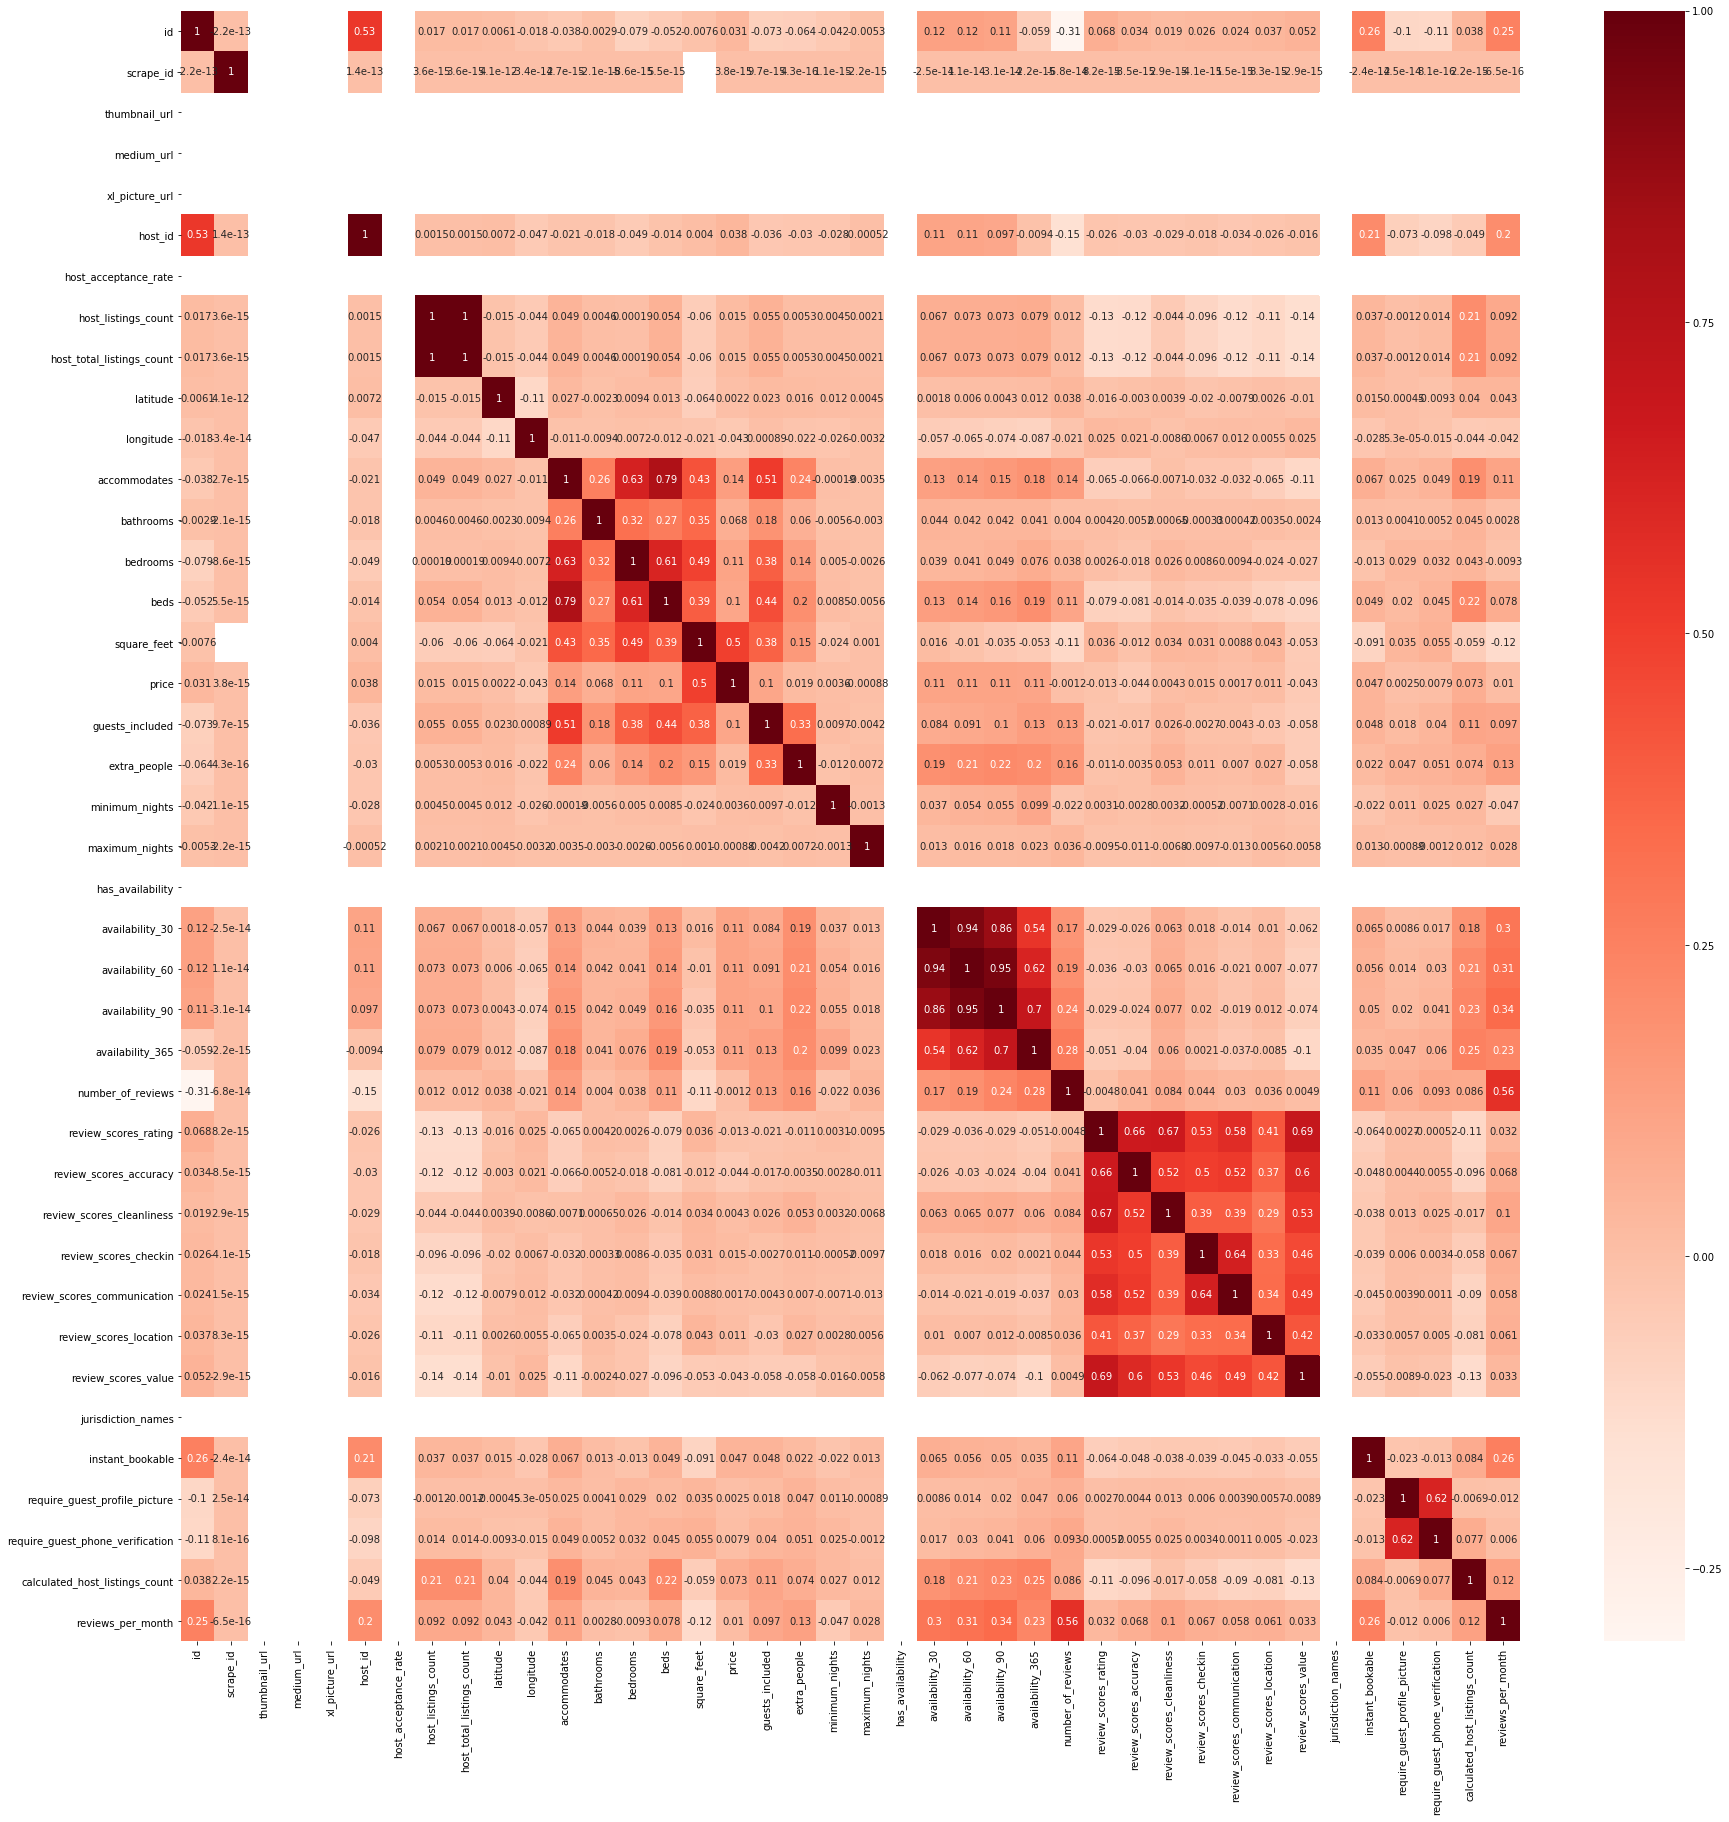

In [94]:
plt.figure(figsize=(30,30))
cor = listings_summary.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [103]:
data_listings = listings_summary

In [104]:
columns_drop=['scrape_id',
'last_scraped',
'summary',
'space',
'description',
'neighborhood_overview',
'notes',
'transit',
'access',
'interaction',
'house_rules',
'thumbnail_url',
'medium_url',
'picture_url',
'xl_picture_url',
'host_about',
'host_response_time',
'host_response_rate',
'host_acceptance_rate',
'host_thumbnail_url',
'host_picture_url',
'host_neighbourhood',
'neighbourhood',
'market',
'smart_location',
'country_code',
'country',
'is_location_exact',
'square_feet',
'weekly_price',
'monthly_price',
'security_deposit',
'cleaning_fee',
'calendar_updated',
'calendar_last_scraped',
'first_review',
'last_review',
'requires_license',
'license',
'jurisdiction_names']

In [105]:
data_listings= data_listings.drop(columns_drop, axis=1)

In [106]:
data_listings.shape

(22552, 56)

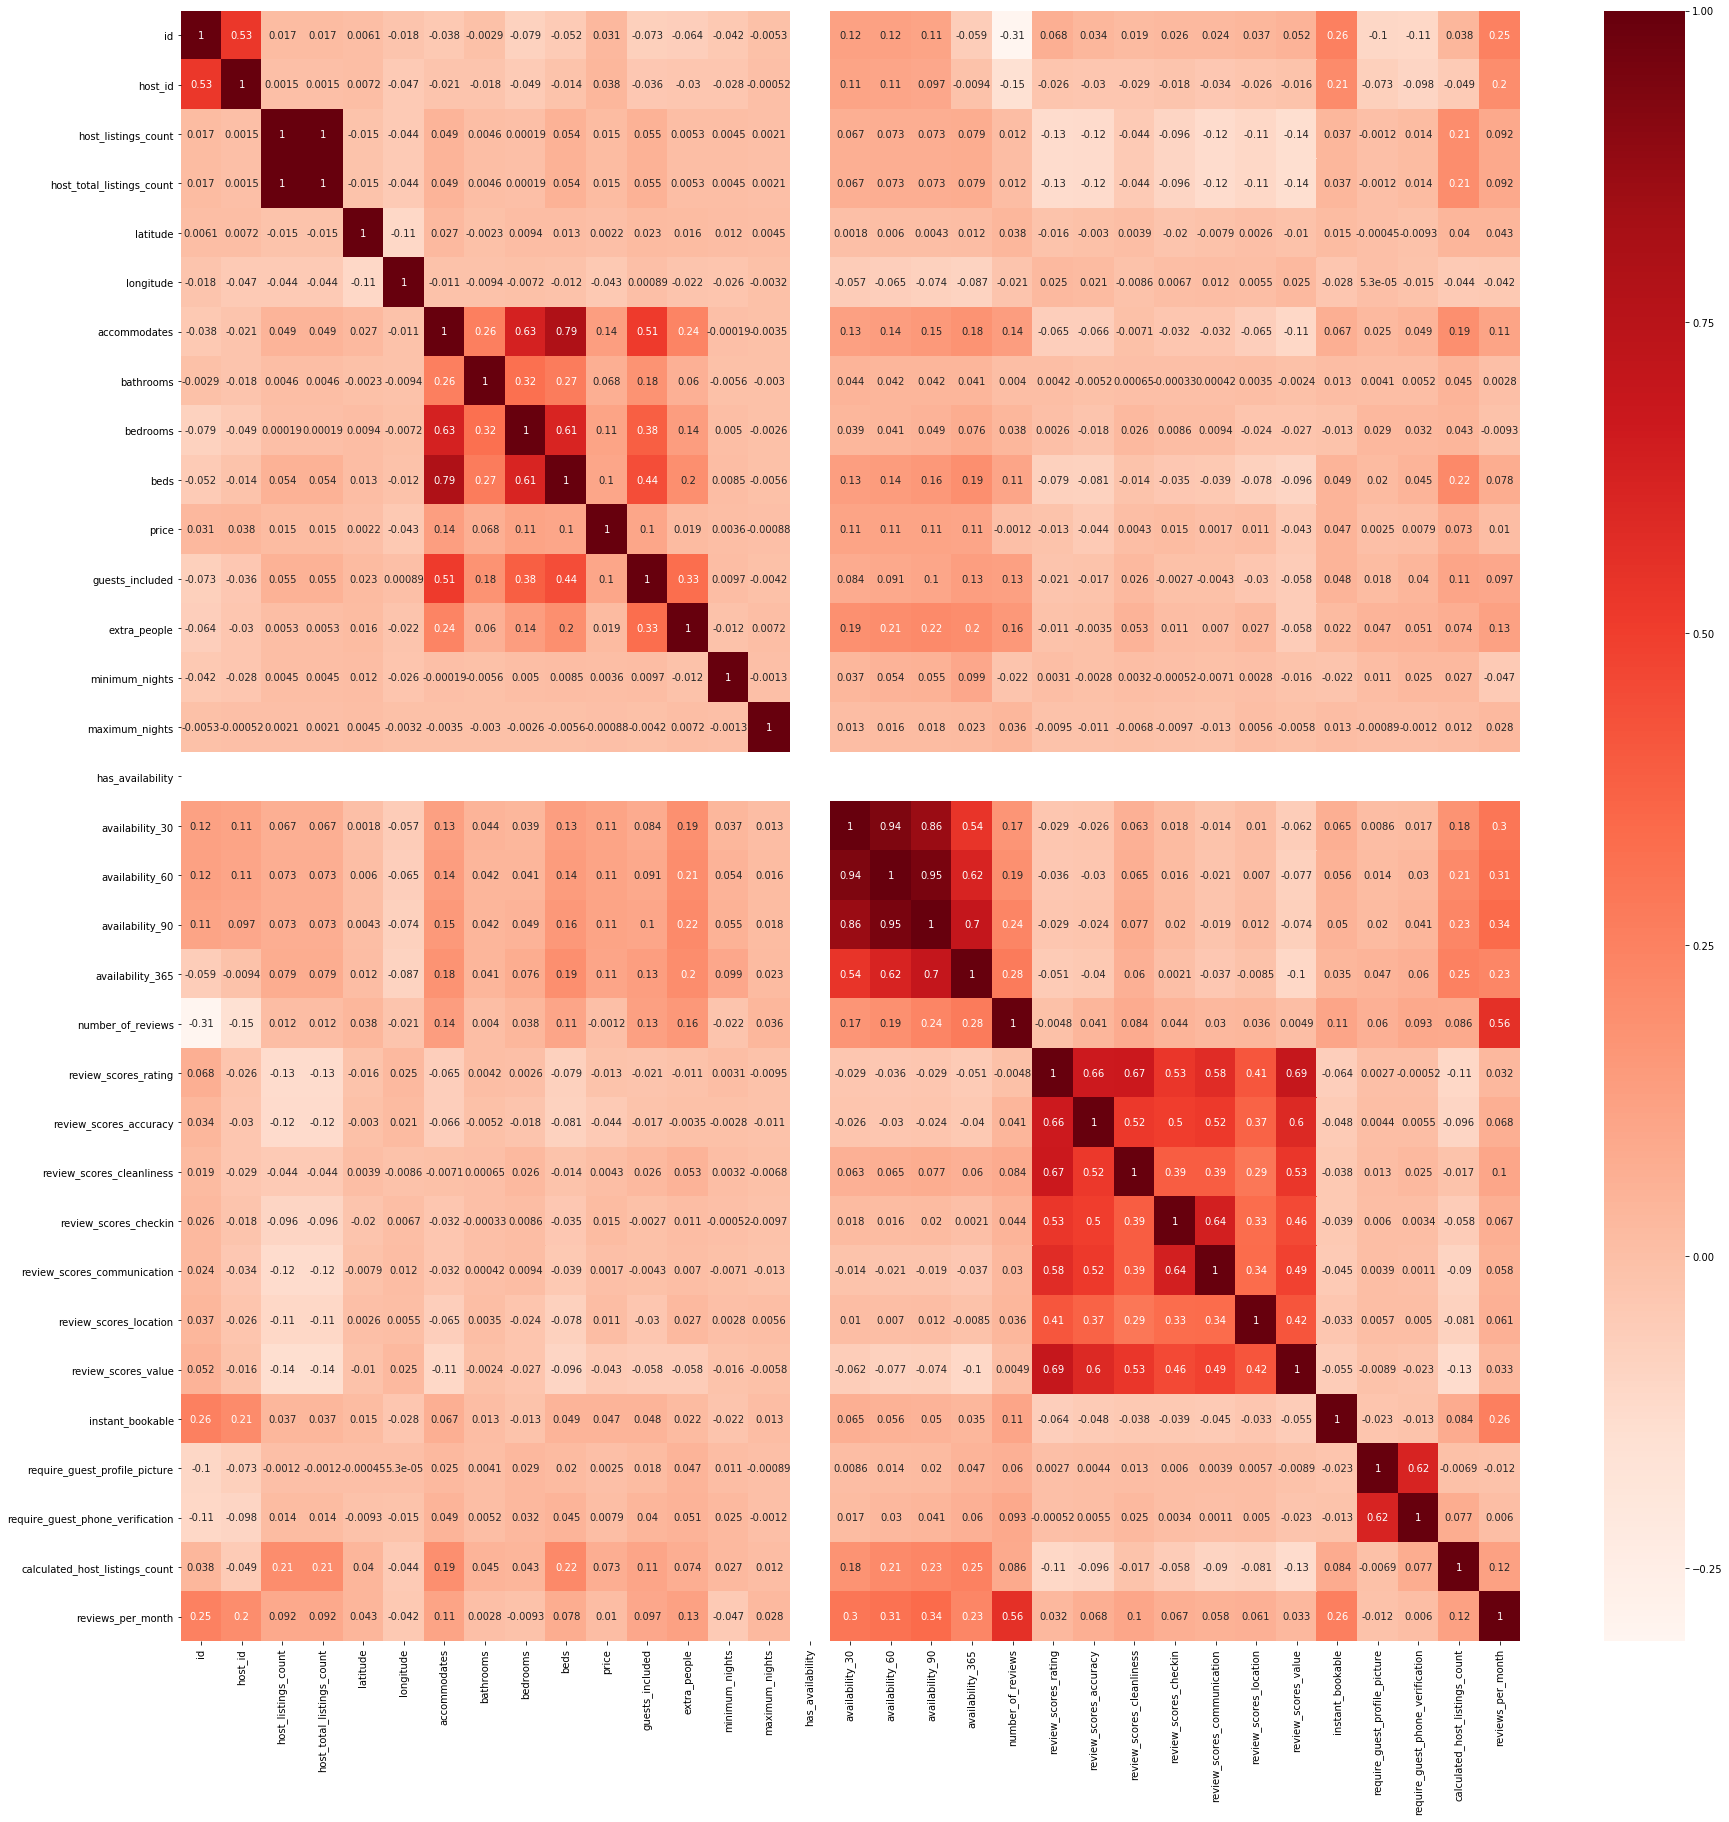

In [107]:
plt.figure(figsize=(30,30))
cor = data_listings.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()